# Practical 12

# Develop an application to predict if the customer will subscribe in bank term deposit or not using logistic regression classifier.

In [1]:
# Consider a portugese banking dataset which is related to direct marketing campaigns(phone calls).
# The classification goal here is to predict wether the client will subscribe a term deposit(variable y) with the bank or not

In [2]:
# Import the data set.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data= pd.read_csv("D:/Machine Learning/Banking.csv")
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


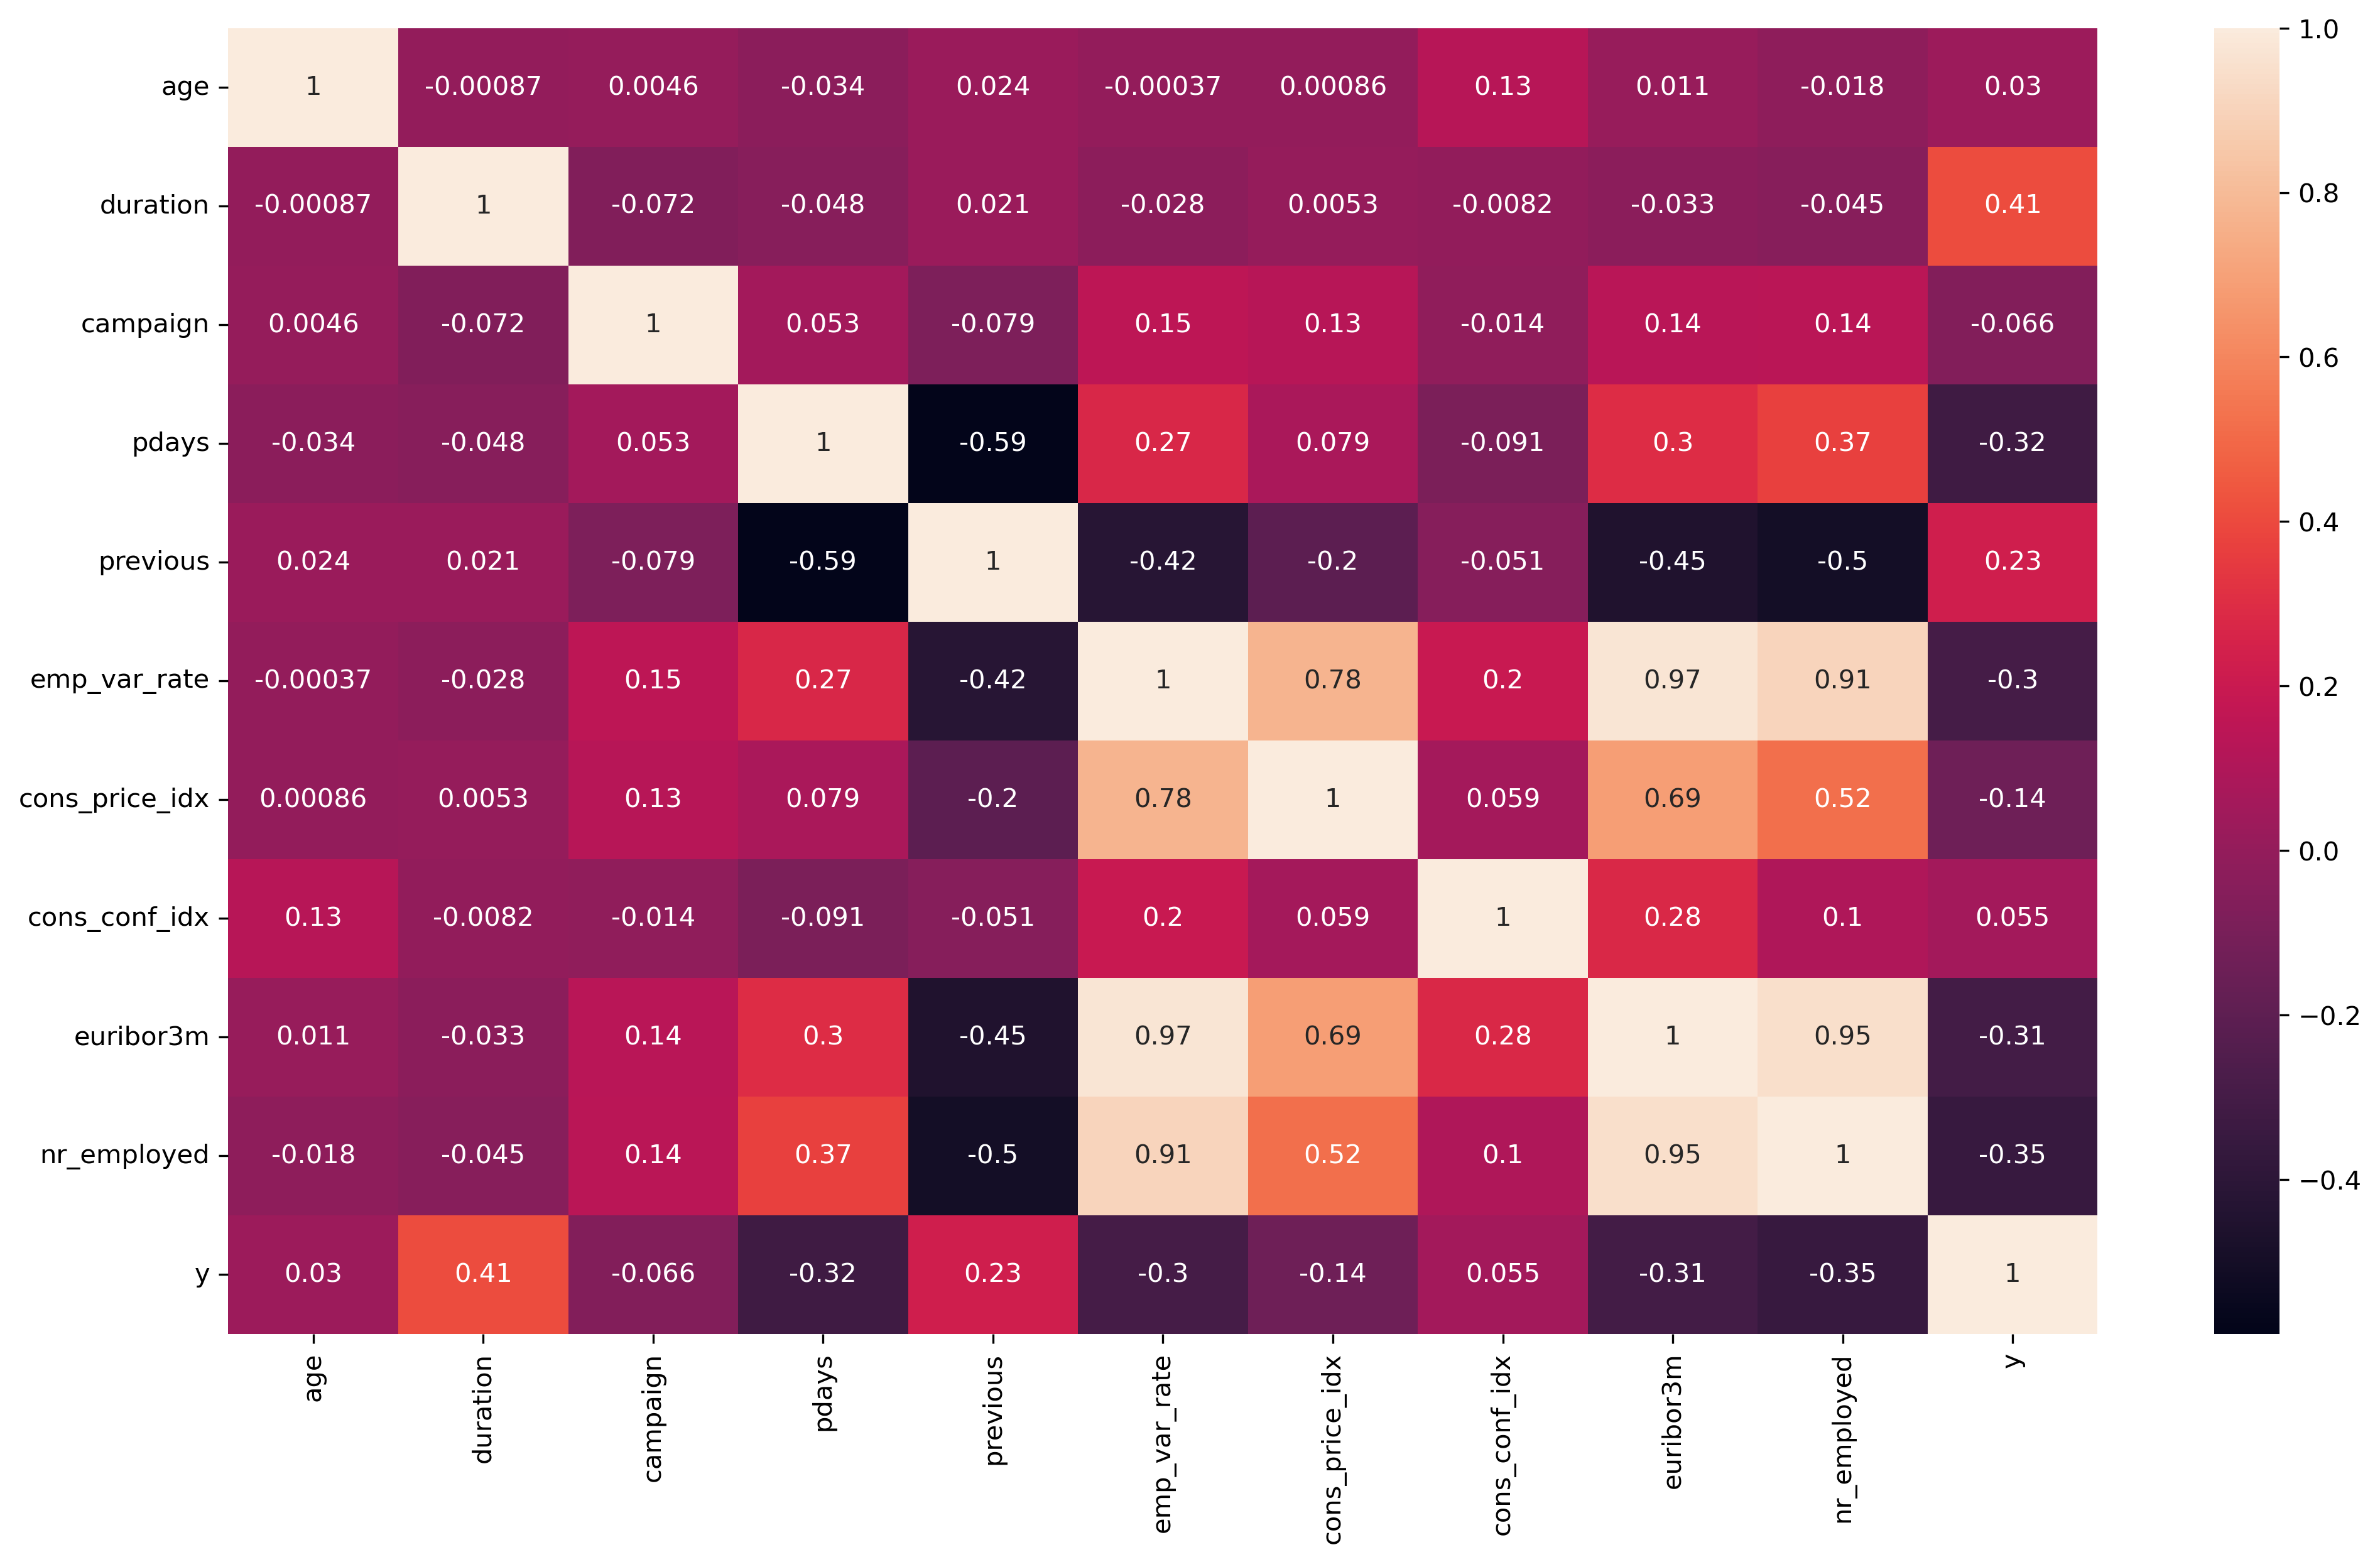

In [4]:
fig = plt.figure(figsize = (16,9) , dpi = 300)  #Creating histogram for finding the correlation among the variables.
sns.heatmap(data.corr(),annot = True) #pearson correlation

plt.show()

In [5]:
# Input
x = data.iloc[:,[12,15]].values
#Output
y = data.iloc[:,-1].values

In [6]:
from sklearn.model_selection import train_test_split  # Splitting the data in training and testing
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25 , random_state = 0 )

In [7]:
from sklearn.preprocessing import StandardScaler  # Scaling
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)
print(xtrain)

[[ 0.19458666 -0.11016551]
 [ 0.19458666 -1.1909054 ]
 [ 0.19458666  0.65270971]
 ...
 [ 0.19458666  0.84342851]
 [ 0.19458666 -1.1909054 ]
 [ 0.19458666  0.84342851]]


In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [9]:
y_pred = classifier.predict(xtest)

In [10]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
print("Confusion Matrix : \n" , cm)

Confusion Matrix : 
 [[9032  124]
 [ 891  250]]


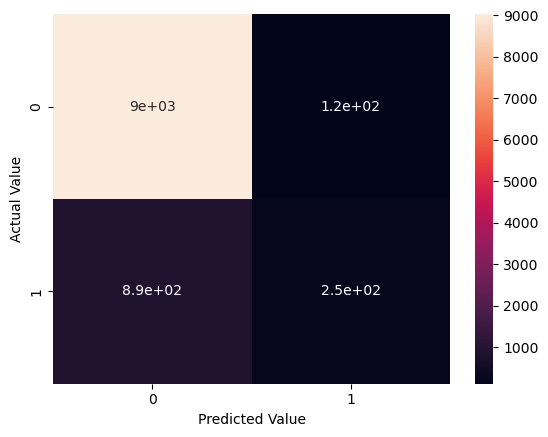

In [11]:
sns.heatmap(cm, annot = True)  # Creating a confusion matrix in form of Heatmap
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

In [12]:
import sklearn.metrics as metrics  # Finding accuracy precision and recall
print ('Accuracy: ', metrics.accuracy_score(ytest,y_pred))
print ('Precision: ', metrics.precision_score(ytest,y_pred))
print ('Recall: ', metrics.recall_score(ytest,y_pred))

Accuracy:  0.9014276002719238
Precision:  0.6684491978609626
Recall:  0.21910604732690622


In [13]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9156
           1       0.67      0.22      0.33      1141

    accuracy                           0.90     10297
   macro avg       0.79      0.60      0.64     10297
weighted avg       0.88      0.90      0.88     10297



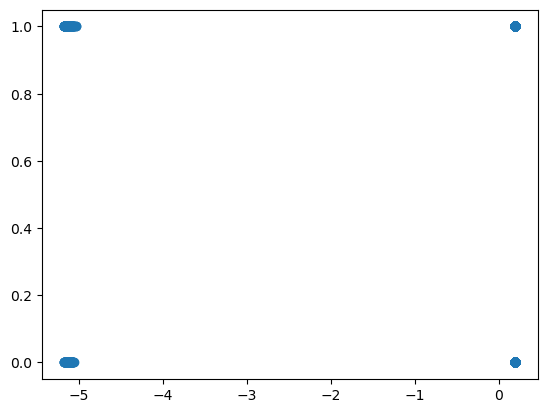

In [14]:
plt.scatter(xtrain[:, 0], ytrain)  # Plotting a scatter plot for training data

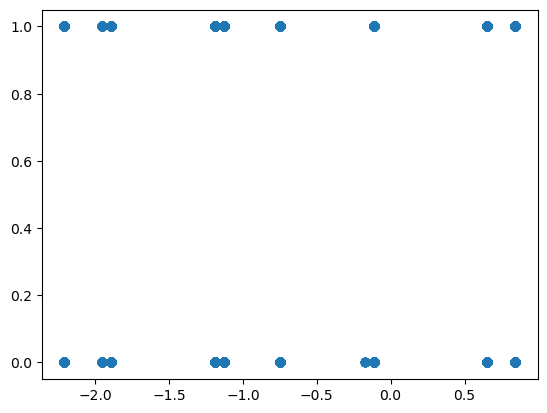

In [15]:
plt.scatter(xtrain[:, 1], ytrain)  